In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Import Data

## Understanding the Data

In [3]:
heart_df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
heart_df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Check for missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Statistical measures
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Check for the distribution of the Target Variable
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Visualization

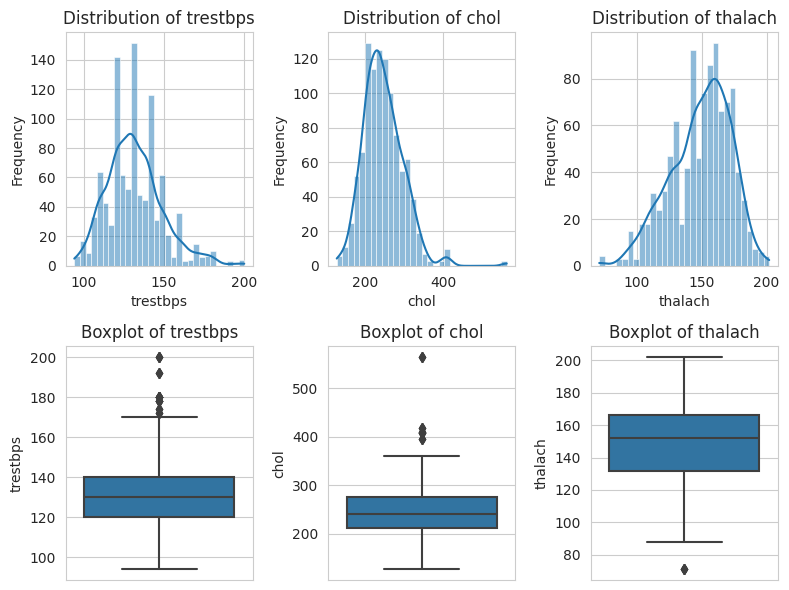

In [10]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

features = ['trestbps', 'chol', 'thalach']

#Create subplots for each numerical column
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(heart_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
#Create boxplots to check for outliers
for i, feature in enumerate(features, i):
    plt.subplot(2,3, i+1)
    sns.boxplot(y=heart_df[feature])
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

As we can see here, we have outliers. We will be back here later for the outliers if our model is not doing good.

In [11]:
heart_df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

Plot the data to check who has more likely in `Male` and `Female` to have a Heart Disease with respect to their `Age`.  

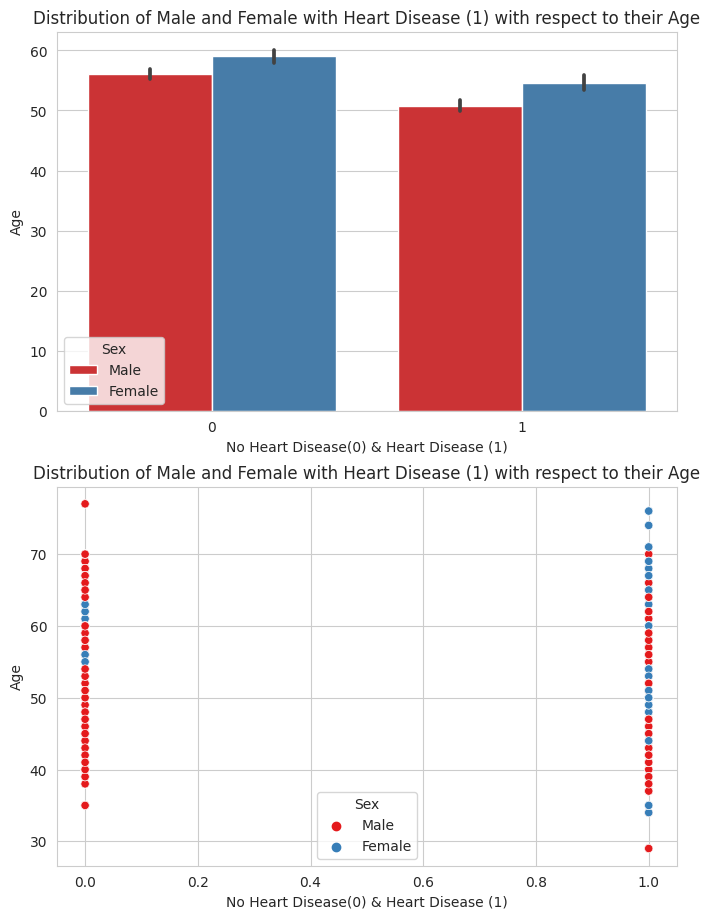

In [12]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Make a copy of the dataframe heart_df so that I can map the value of 'sex' column to 
# 'Male' and 'Female' for visualization process only
heart_df_copy = pd.DataFrame(heart_df).copy()

heart_df_copy['sex'] = heart_df_copy['sex'].map({1: 'Male', 0: 'Female'})

sns.barplot(x='target', y='age', hue='sex', data=heart_df_copy, palette='Set1', ax=axes[0])
axes[0].set_title('Distribution of Male and Female with Heart Disease (1) with respect to their Age')
axes[0].set_xlabel('No Heart Disease(0) & Heart Disease (1)')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.scatterplot(x='target', y='age', hue='sex', data=heart_df_copy, palette='Set1', ax=axes[1])
axes[1].set_title('Distribution of Male and Female with Heart Disease (1) with respect to their Age')
axes[1].set_xlabel('No Heart Disease(0) & Heart Disease (1)')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

plt.subplots_adjust(top=1.5)


plt.show()

## Observations:

I have uses both the barplot and scatterplot for visualization:

   * Barplot for a more visualization to recognize the `Male` and `Female`.
   * Scatterplot in order to recognize what `Age` most likely the `Heart Disease` occur.
   
        1. We can see here that most `Female` has the highest rating of having a `heart disease` than `Male`.
        2. We can also see that in the age of `29`, `Heart Disease` can already occur.

# Model Building

In [13]:
X = heart_df.drop(['target', 'age', 'sex'], axis=1)
y = heart_df.target

In [14]:
# Split data into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(820, 11)
(205, 11)


In [16]:
print(y_train.shape)
print(y_test.shape)

(820,)
(205,)


# Model Training

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Check for Accuracy Score

In [18]:
dt_X_train_pred = dt_model.predict(X_train)
dt_train_accuracy = accuracy_score(dt_X_train_pred, y_train)

print("Accuracy for Training set: ", dt_train_accuracy)

Accuracy for Training set:  1.0


In [19]:
dt_X_test_pred = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(dt_X_test_pred, y_test)

print("Accuracy for Testing set: ", dt_test_accuracy)

Accuracy for Testing set:  1.0


As we can here, our training data and test data has the accuracy of `1.0`. This maybe have some factors why is it became a `1.0` in the first try.


We will use classification report on our `X` and `y` now to check if it has an error.

In [20]:
y_pred = dt_model.predict(X)

report = classification_report(y_pred, y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



## Observation:
   1. Even by using classification report, our `DecisionTreeClassifier` is maybe the best fit model in this dataset.
   2. Maybe the dataset is too small.
   
   
   
#### Let's proceed by creating a new unseen data and check for our prediction

In [21]:
X.columns

Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [22]:
new_data = {
    'cp': [2, 2, 3, 1, 0],
    'trestbps': [150, 174, 162, 103, 90],
    'chol': [120, 570, 345, 600, 100],
    'fbs': [1, 0, 1, 1, 0],
    'restecg': [2, 2, 1, 0, 1],
    'thalach': [205, 70, 65, 83, 210],
    'exang': [1, 0, 1, 1, 1],
    'oldpeak': [0.0, 2.6, 6.5, 7.0, 1.7],
    'slope': [2, 0, 1, 2, 1],
    'ca': [3, 2, 0, 1, 1],
    'thal': [2, 3, 3, 2, 0]
}


new_heart_df = pd.DataFrame(new_data)
new_heart_df

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,2,150,120,1,2,205,1,0.0,2,3,2
1,2,174,570,0,2,70,0,2.6,0,2,3
2,3,162,345,1,1,65,1,6.5,1,0,3
3,1,103,600,1,0,83,1,7.0,2,1,2
4,0,90,100,0,1,210,1,1.7,1,1,0


In [23]:
new_data_pred = dt_model.predict(new_heart_df)

In [24]:
# store new data prediction to the dataframe

new_heart_df['target'] = new_data_pred

In [25]:
new_heart_df

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,150,120,1,2,205,1,0.0,2,3,2,0
1,2,174,570,0,2,70,0,2.6,0,2,3,0
2,3,162,345,1,1,65,1,6.5,1,0,3,0
3,1,103,600,1,0,83,1,7.0,2,1,2,1
4,0,90,100,0,1,210,1,1.7,1,1,0,0


### If someone who maybe able to read my model or work, please feel free to comment how was my model or if there is any error that I did.

# Your help is much appreciated. Thank you!